In [160]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA 

In [161]:
import tensorflow as tf
import tensorflow.keras


## Problem

We have a dataset with all projects from Kickstarter for the last year. We want to understand what makes a project successful based on the data we have. 
- What are the reasons for a Kickstarter project to be successful?
- What are the characteris of a successful Kickstarter project?

## Discover the data

In [162]:
data = pd.read_csv('data/ks-projects-201801.csv')
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### Display number of values of categorical features

Categorical features has to be one-hot encoded. Unfortunately, too many features will not help us with the model. It has to be decided which features to use.

In [163]:
categorical_features = data[['category', 'main_category', 'currency', 'country']]
for category in categorical_features:
    print(f'"{category}" has {len(categorical_features[category].value_counts())} values.')

"category" has 159 values.
"main_category" has 15 values.
"currency" has 14 values.
"country" has 23 values.


### Displaying the most successful and failed categories

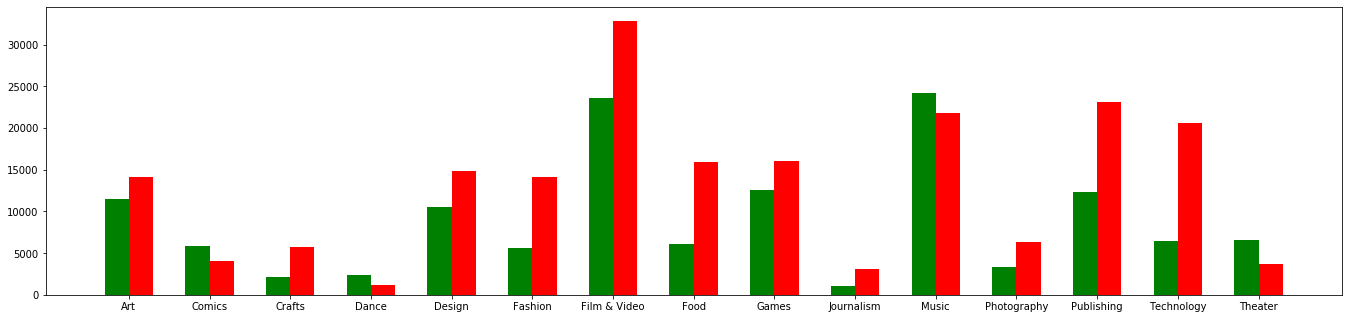

In [164]:
main_cats_sucess = data[data["state"] == "successful"]["main_category"].value_counts().sort_index()
main_cats_failed = data[data["state"] == "failed"]["main_category"].value_counts().sort_index()

fig = plt.figure()

ind = np.arange(len(main_cats_sucess)) 
width = 0.3

ax = fig.add_axes([0,0,3,1])
ax.bar(ind, list(main_cats_sucess.values), width = width, color = "g")
ax.bar(ind + width, list(main_cats_failed.values), width = width, color = "r")

plt.xticks(ind + width / 2, main_cats_sucess.index)

plt.show()

### Finding the most successful projects based on correlations

There is high correlation for **backers** and **pledged** money, which is normal. The correlations between categories are not strong. It can be seen that projects from US and with USD currency are most successful. 

In [165]:
dummies_corr = pd.get_dummies(data, columns = ["main_category", "currency", "country", "state"]).corr()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
dummies_corr["state_successful"].sort_values(ascending=False)

state_successful              1.000000
backers                       0.129109
pledged                       0.111534
usd_pledged_real              0.110704
usd pledged                   0.097791
main_category_Music           0.093623
main_category_Theater         0.088260
country_US                    0.076169
main_category_Comics          0.066792
currency_USD                  0.065202
main_category_Dance           0.055926
main_category_Art             0.032645
main_category_Film & Video    0.016683
country_GB                    0.003010
main_category_Games           0.001038
currency_GBP                  0.000123
country_HK                   -0.000359
currency_HKD                 -0.000359
ID                           -0.001200
country_LU                   -0.001266
main_category_Design         -0.001790
country_SG                   -0.002648
currency_SGD                 -0.002648
country_DK                   -0.003442
currency_DKK                 -0.003789
country_JP               

In [172]:
dummies_corr = pd.get_dummies(data, columns = ["category", "state"]).corr()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
dummies_corr["state_successful"].sort_values(ascending=False)

state_successful               1.000000
backers                        0.129109
pledged                        0.111534
usd_pledged_real               0.110704
usd pledged                    0.097791
category_Tabletop Games        0.082902
category_Theater               0.077945
category_Indie Rock            0.073611
category_Shorts                0.071547
category_Country & Folk        0.063412
category_Dance                 0.050980
category_Classical Music       0.048213
category_Rock                  0.046277
category_Comic Books           0.041920
category_Comics                0.035753
category_Jazz                  0.035610
category_Illustration          0.030456
category_Anthologies           0.029606
category_Plays                 0.029033
category_Performances          0.028405
category_Public Art            0.027960
category_Graphic Novels        0.027746
category_Art Books             0.026990
category_Music                 0.024039
category_Pop                   0.022172


### Extract dates to year, month and day

In [166]:
data_processed = data.copy()
data_processed['launched_year'] = pd.DatetimeIndex(data['launched']).year
data_processed['launched_month'] = pd.DatetimeIndex(data['launched']).month
data_processed['launched_day'] = pd.DatetimeIndex(data['launched']).day

data_processed['deadline_year'] = pd.DatetimeIndex(data['deadline']).year
data_processed['deadline_month'] = pd.DatetimeIndex(data['deadline']).month
data_processed['deadline_day'] = pd.DatetimeIndex(data['deadline']).day

In [167]:
data_processed = data_processed.drop(['deadline', 'launched', 'name', 'usd pledged'], axis=1)

In [168]:
data_processed = pd.get_dummies(data_processed, columns = ["main_category", "category", "country", "currency"])

In [169]:
data_labels = data_processed['state']
#data_processed = data_processed.drop(['state'], axis=1)

In [171]:
dummies_corr = pd.get_dummies(data_processed, columns = ["launched_year", "launched_month", "launched_day", "deadline_year", "deadline_month", "deadline_day", "state"]).corr()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
dummies_corr["state_successful"].sort_values(ascending=False)

state_successful               1.000000
backers                        0.129109
pledged                        0.111534
usd_pledged_real               0.110704
main_category_Music            0.093623
main_category_Theater          0.088260
category_Tabletop Games        0.082902
category_Theater               0.077945
country_US                     0.076169
category_Indie Rock            0.073611
category_Shorts                0.071547
main_category_Comics           0.066792
currency_USD                   0.065202
deadline_year_2011             0.064067
category_Country & Folk        0.063412
launched_year_2011             0.062843
deadline_year_2013             0.061414
launched_year_2013             0.060652
deadline_year_2012             0.059382
launched_year_2012             0.059076
main_category_Dance            0.055926
category_Dance                 0.050980
category_Classical Music       0.048213
category_Rock                  0.046277
category_Comic Books           0.041920


### Dates insights and decisions
Based on the correlations and observations, it seems that year and day information about launches and deadlines does not give us a lot of information. Only months will be used in order to gain knowledge which are the best months for starting and ending a project.

### Creating new feature - duration of a project

In [202]:
from datetime import date
launched = pd.DatetimeIndex(data['launched'])
deadline = pd.DatetimeIndex(data['deadline'])

data["duration"] = (deadline - launched).days
data

dummies_corr = pd.get_dummies(data, columns = ["state"]).corr()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
dummies_corr["state_successful"].sort_values(ascending=False)
data = data[data["duration"] < 10000]

C:\Users\VGeorgiev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


state_successful    1.000000
backers             0.129108
pledged             0.111533
usd_pledged_real    0.110703
usd pledged         0.097790
ID                 -0.001205
usd_goal_real      -0.023052
goal               -0.024333
state_suspended    -0.051773
state_live         -0.063849
state_undefined    -0.072101
duration           -0.118385
state_canceled     -0.249901
state_failed       -0.773444
Name: state_successful, dtype: float64

In [179]:
data["launched"]

0         2015-08-11 12:12:28
1         2017-09-02 04:43:57
2         2013-01-12 00:20:50
3         2012-03-17 03:24:11
4         2015-07-04 08:35:03
                 ...         
378656    2014-09-17 02:35:30
378657    2011-06-22 03:35:14
378658    2010-07-01 19:40:30
378659    2016-01-13 18:13:53
378660    2011-07-19 09:07:47
Name: launched, Length: 378661, dtype: object

## Dimensionality Reduction

In [87]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_processed)

<bound method PCA.score of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>